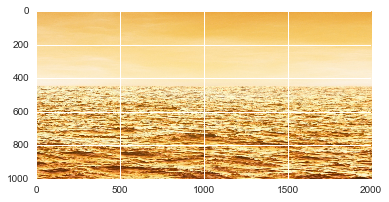

In [191]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import dct,idct
import seaborn as sea
import copy as cp
img = cv2.imread('ocean.jpg')
plt.imshow(img)
plt.show()

## Implemented DCT & IDCT for 2D using python functions

In [192]:
from scipy.fftpack import dct
def DCT_2d(M):
    return dct(dct(M.T, norm='ortho').T,norm='ortho')

In [193]:
from scipy.fftpack import idct
def IDCT_2d(M):
    return idct(idct(M, norm='ortho').T, norm='ortho').T

## Proving the correctness

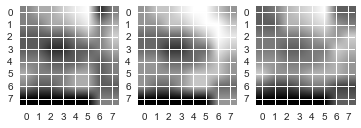

In [194]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

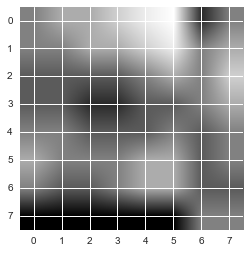

In [195]:
plt.imshow(part_of_the_img_0)
M = DCT_2d(part_of_the_img_0)

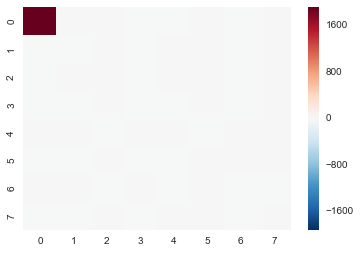

In [196]:
sea.heatmap(M)

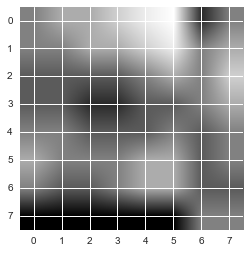

In [197]:
M1 = IDCT_2d(M)
plt.imshow(M1)

## Check the similarity of the initial matrix and the one we finally became

In [198]:
M1

array([[ 240.,  239.,  239.,  238.,  237.,  236.,  242.,  240.],
       [ 240.,  240.,  239.,  239.,  238.,  237.,  240.,  239.],
       [ 241.,  241.,  241.,  241.,  240.,  239.,  240.,  238.],
       [ 241.,  241.,  242.,  242.,  241.,  241.,  240.,  239.],
       [ 240.,  240.,  241.,  241.,  241.,  240.,  241.,  240.],
       [ 239.,  240.,  240.,  240.,  239.,  239.,  241.,  240.],
       [ 240.,  241.,  241.,  240.,  239.,  239.,  241.,  241.],
       [ 243.,  243.,  243.,  243.,  243.,  243.,  240.,  240.]])

In [199]:
part_of_the_img_0

array([[240, 239, 239, 238, 237, 236, 242, 240],
       [240, 240, 239, 239, 238, 237, 240, 239],
       [241, 241, 241, 241, 240, 239, 240, 238],
       [241, 241, 242, 242, 241, 241, 240, 239],
       [240, 240, 241, 241, 241, 240, 241, 240],
       [239, 240, 240, 240, 239, 239, 241, 240],
       [240, 241, 241, 240, 239, 239, 241, 241],
       [243, 243, 243, 243, 243, 243, 240, 240]], dtype=uint8)

In [200]:
M1 == part_of_the_img_0

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [201]:
print M1[1][6]
print part_of_the_img_0[1][6]

240.0
240


Notice that the matrixes are similar, they differ only by type, so the functions work!

## Let me introduce our basic functions :)

In [202]:
TM = np.matrix('1 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0')

[[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]]


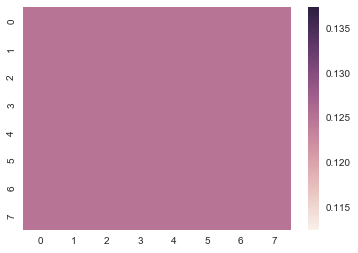

In [203]:
M1 = IDCT_2d(TM) #inverse DCT
sea.heatmap(M1) #as expected the function is constant
print M1

In [204]:
TM1 = np.matrix('0 1 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

[[ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]]


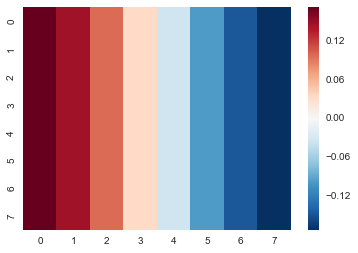

In [205]:
M2 = IDCT_2d(TM1)
sea.heatmap(M2) #the function is cos(...) 
print M2

In [206]:
TM1[0,1]

1

And so on we can become the bases functions

## Let's try to affect the [0,1] elem of DCT 2d

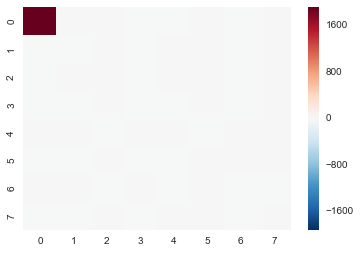

In [207]:
#plt.imshow(part_of_the_img_0)
T = DCT_2d(part_of_the_img_0)
sea.heatmap(T)

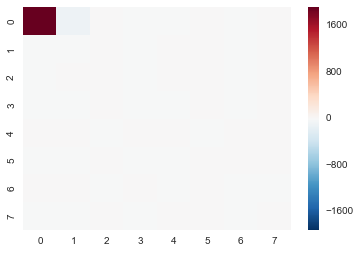

In [208]:
T = DCT_2d(part_of_the_img_0-100*M2) #M2 - THE BASIC FUNCTION OF [0,1]
sea.heatmap(T)

### Hurrray we changed the [0,1] coeff of DCT !!!

## Now have a look at initial and changed pictures 

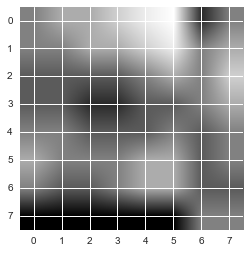

In [209]:
plt.imshow(part_of_the_img_0) # original

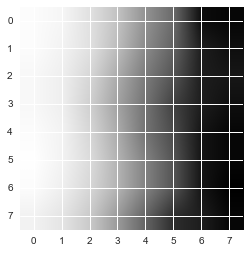

In [210]:
plt.imshow(part_of_the_img_0-100*M2) #transformed

The numbers in pixels change smoothly, this gives a hope that our changes will not be noticed by histograms!

## Experimentation with matrix modifiers

(1000, 2000, 3)
TM0:


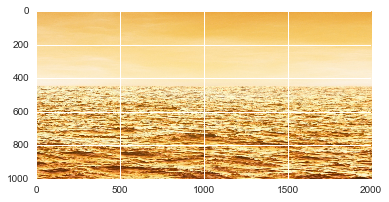

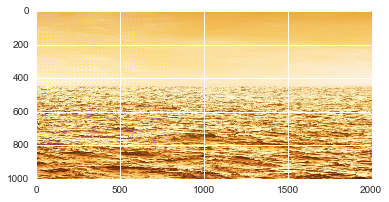

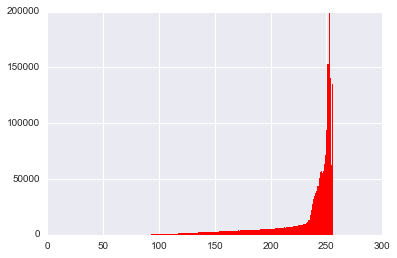

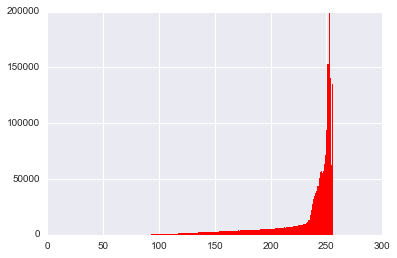

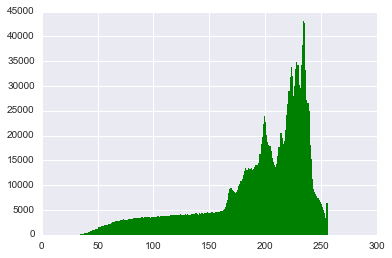

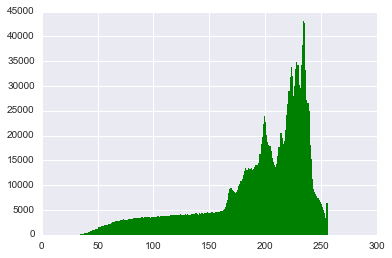

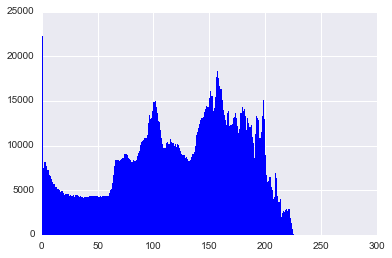

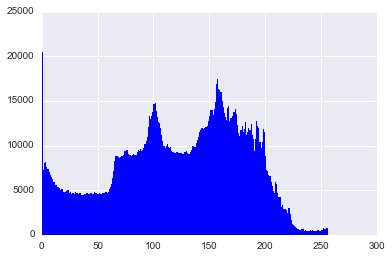

In [221]:
testblock = img[250:258, 150:158, 0]
print img.shape



def testmodifier(modifier, rstart, cstart, blockNum):
    img_toplay = cp.copy(img)
    
    for i in range(0,blockNum):
        for j in range(0,blockNum):
            img_block = cp.copy(img[rstart + i*8:rstart+8 + i*8, cstart + j*8:cstart+8 + j*8])
            scale = 1#7*16
            addend = IDCT_2d(scale * modifier)
            #img_block[:,:,0] = img_block[:,:,0] + addend
            #img_block[:,:,1] = img_block[:,:,1] + addend
            img_block[:,:,2] = img_block[:,:,2] + addend
    

            img_toplay[rstart+i*8:rstart+8+i*8, cstart+j*8:cstart+8+j*8] = img_block
            #diff = (-img + img_toplay)[250:258,150:158]
    
    plt.imshow(img)
    plt.show()
    
    plt.imshow(img_toplay)
    plt.show()
    
    cv2.imwrite('lena_modified.jpg', img_toplay)
    
    
    bins = [0]
    for n in range(0, 257):
        bins.append(n)

    width = 1
    leftborders = bins[:-1]


    # Red plane
    coverhistred = np.histogram(img[:,:,0], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='r')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,0], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='r')
    plt.show()
   
    coverhistred = np.histogram(img[:,:,1], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='g')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,1], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='g')
    plt.show()
    
    coverhistred = np.histogram(img[:,:,2], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='b')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,2], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='b')
    plt.show()
    
    
tm0 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

one_bit_matrix = np.matrix('16 11 10 16 24 40 51 61\
                ; 12 12 14 19 26 58 60 55 \
                ; 14 13 16 24 40 57 69 56 \
                ; 14 17 22 29 51 87 80 62 \
                ; 18 22 37 56 68 109 103 77 \
                ; 24 35 55 64 81 104 113 92 \
                ; 49 64 78 87 103 121 120 101 \
                ; 72 92 95 98 112 100 103 99')


tm9 = np.matrix('112 0 0 0 0 0 0 0\
               ; 0 84 0 0 0 0 0 0\
               ; 0 0 112 0 0 0 0 0\
               ; 0 0 0 0 100 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 99')

tm1 = np.matrix('1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1')

tm2 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm3 = np.matrix('1 1 1 1 1 1 1 1\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

tm4 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 1 1 1 1 1 1 1 1')

tm5 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm6 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 1 0 0 0 0 0 0\
               ; 0 0 1 0 0 0 0 0\
               ; 0 0 0 1 0 0 0 0\
               ; 0 0 0 0 1 0 0 0\
               ; 0 0 0 0 0 1 0 0\
               ; 0 0 0 0 0 0 1 0\
               ; 0 0 0 0 0 0 0 1')

tm7 = np.matrix('0 1 1 1 1 1 1 1\
               ; 1 0 1 1 1 1 1 1\
               ; 1 1 0 1 1 1 1 1\
               ; 1 1 1 0 1 1 1 1\
               ; 1 1 1 1 0 1 1 1\
               ; 1 1 1 1 1 0 1 1\
               ; 1 1 1 1 1 1 0 1\
               ; 1 1 1 1 1 1 1 0')

tm8 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 1 0 0 0 0\
               ; 0 0 0 0 1 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')



#print 'TM0:'
#testmodifier(tm0)
#print 'TM1:'
#testmodifier(tm1)
#print 'TM2:'
#testmodifier(tm2)
# print 'TM3:'
# testmodifier(tm3)
#print 'TM4:'
#testmodifier(tm4)
# print 'TM5:'
# testmodifier(tm5)
# print 'TM6:'
# testmodifier(tm6)
# print 'TM7:'
# testmodifier(tm7)

print 'TM0:'
testmodifier(one_bit_matrix,0,0,100)